##### Python for High School (Summer 2022)

* [Table of Contents](PY4HS.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/ADS_highschool_math.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/ADS_highschool_math.ipynb)


<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52141123213/in/dateposted-public/" title="Dual Pairs"><img src="https://live.staticflickr.com/65535/52141123213_77f146cdfd_c.jpg" width="800" height="580" alt="Dual Pairs"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

# High School Mathematics
#### by Kirby Urner
<br />
High school mathematics is a moving target and to track it is to change it, if only by adding to one's awareness of where we've been.  Nor does every subculture follow the same evolutionary path.  The Republic of South Africa (RSA), which I've had the privilege of visiting (our family base was in Lesotho), faces a different set of challenges than California or Oregon.  Different, yet partially overlapping.


My thanks to Mark Shuttleworth of Canonical, and to Guido van Rossum, Python's inventor, [for having me join them](https://worldgame.blogspot.com/2017/03/in-service.html) in Greater London in 2006, along with other curriculum developers, to brainstorm about the RSA's future.

One entry point into the many debates is the role of technology and how should it be used.  

In this Jupyter Notebook, we look at the actual and/or potential role of Jupyter Notebooks along with their wider ecosystem.  Historically speaking, they developed from the Python world as I-Python Notebooks.  

Nowadays, Jupyter Notebooks may be used to introduce several computer languages.  But what do computer languages have to do with mathematics?  Nothing?  

## The Role of Visualization

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/479678482/in/photolist-DgvS4F-bULvdT-2miELnw-wsqaNG-wsqcoN-cc8Kt7-bULvP6-bULw4P-cc8K3y-bULvpT-bULvYn-bULvak-cc8KGo-cc8JYu-cc8KS5-bULvzn-cc8L59-bULvjH-cc8KBu-aGEsaR-aCuw56-9XLUuT-8dUDpo-8bdJLL-88zU7H-76XsYs-JotGE-Joy8X" title="Inscribed Polyhedron"><img src="https://live.staticflickr.com/215/479678482_5e8564dd0b_o.jpg" width="387" height="386" alt="Inscribed Polyhedron"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

One school of thought, associated with the Bourbaki School (Bourbaki was a fictive mascot for a group of mathematicians), suggests [staying away from direct depiction](https://www.17thshard.com/forum/topic/87667-jasnah-kholin-nicolas-bourbaki-and-disdain-for-visual-arts/), while relying instead on typography.  A mathematics book should consist of numbered axioms and theorems, with definitions provided, and with only a sparse smattering of figures, if any.

Benoit Mandelbrot, who helped usher in the visualization of "fractals" (shapes of fractional dimension), in collaboration with IBM, felt himself to be at the opposite pole, insisting on direct depiction as a valid contribution to mathematics, and not redundant with the typographical aspects.

A previous standard among high school level textbook centric curricula favored passive consumption of published figures (including plots and polyhedrons), but without much attention devoted to the tools and skills needed for the generation thereof. Students were not equipped with desktop publishing skills until later, when becoming more specialized.

Desktop publishing skills were considered "vocational" or "shop" skills akin to "mechanical drawing".  Pure mathematicians in training had no time for such detours.  

But then high school was never a bastion of anything "pure" i.e. the disciplines are purposely hybridized.  In blending mathematics and computer science, we're bringing in the software tools needed for 2D plots and 3D renderings.  

Animations, with the added time dimension (flip book frames of action), are just around the corner for those wishing to dive deeper.

The newly emerging consensus more closely matches the needs of industry, wherein even individual communications, such as text messages, get pushed to an industry standard on some electronic platform (local and/or in the cloud).  Plots and polyhedrons should look professional no matter who is doing them.

In the age of the screen, colored pixels cost no more than black and white ones and populating a text with colorful figures does not make the "book" more expensive, because we're no longer dealing with inked wood pulp as our principal communications medium.

Thanks to computers, we're able to equip more of the population with these practical social media and publication skills.

In [1]:
from IPython.display import YouTubeVideo

## Doodling and Daydreaming

The stereotypical teacher is concerned when Little Johnny doesn't focus and only stares out the window, clearly daydreaming. But what if Little Johnny is daydreaming about maths?  That could be a good thing, right?  Johnny has read ahead and is musing about more advanced concepts.  He does well on tests, so no worries.  Little Jill is daydreaming about Lie Groups and Lie Algebras.

The other bugaboo is "doodling" with many movies having the teacher pause above some hapless student with a notebook, caught doodling.  But then again, what if the doodles are somewhat apropos?  An astute student might weave in enough material from the lecture, to make for some creative note taking and/or ray tracing, the perfect alibi.

Vi Hart, a Youtuber of some renown, has role modeled the bored student who daydreams and doodles, intelligently about the maths that most interests her. The implication is not that she's "too slow" but "too fast" for the conventional content.  She even talks fast.

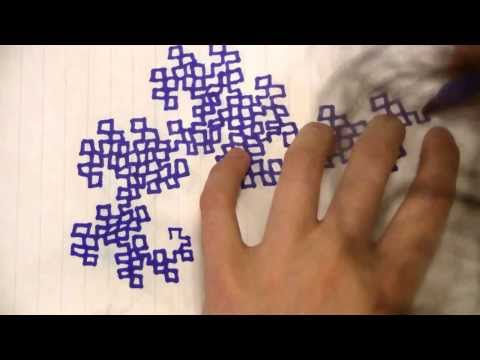

In [2]:
YouTubeVideo("EdyociU35u8") # https://youtu.be/EdyociU35u8

This curriculum encourages JupyterLab as a safe environment in which to experiment with features, try out syntax, explore possibilities.  Unguided and unsupervised learning become a possibility.  The teacher's ultimate aim is to encourage the habits that come with teaching one's self, i.e. the role model is the polymath autodidact, the comprehensivist more than the over-specialist.

Even if some subjects really require teacher - apprentice relationships, not ad hoc trial and error, developing the habits of an autodidact serve one well, just as learning to search the web, transfer funds, stay in the game on various fronts, is of holistic benefit.

With all our emphasis on (a) rendering graphics and (b) exploring Python packages embodying whole lifetimes of maths research (more than any one person digests easily i.e. a feast), the hoped for outcome for the student is:  a sense of never lacking for raw material with which to demonstrate both competence and creativity (these go together).  

This includes having access to the tools of the trade, and knowing what to do with them.  

Think of Orson Welles learning how to make movies from some of Hollywood's best.

## What about Mathematica?

Many of the reforms in math education promulgated by Stephen and Conrad Wolfram are in the same direction as what gets promoted here, more specifically:  taking advantage of a computer language to improve mathematical fluency and vice versa.

Mathematica and Jupyter Notebook have much in common.

Here that computer language is Python.  Another developer might prefer to introduce Julia.

See [Matrix Math](MatrixMath.ipynb) for additional discussion of our goals.

### A Note to Pythonistas

"Pythonista" is how Python programmers like to refer to themselves, regardless of gender.  It's not that "Pythoneer" is the male version, or at least Guido himself, as BDFL, was no fan of that branch in marketing.

Python comes in layers with "3rd party packages" its outermost cloak.  Our curriculum dives into selected 3rd party packages, such as numpy and pandas, right from the outset, without any pretense of giving a thorough account of "core Python" or "the Standard Library" on the way there.

For example, what better time to introduce numpy's `arange` and `linspace` than right after the builtin `range` type has been introduced?  Why wait?  Introduce numpy arrays as another important data structure, along with namedtuples and other collections.

In [3]:
the_domain = range(11)
the_domain

range(0, 11)

In [4]:
import numpy as np
the_domain = np.arange(0, 11, .1)
the_domain

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9])

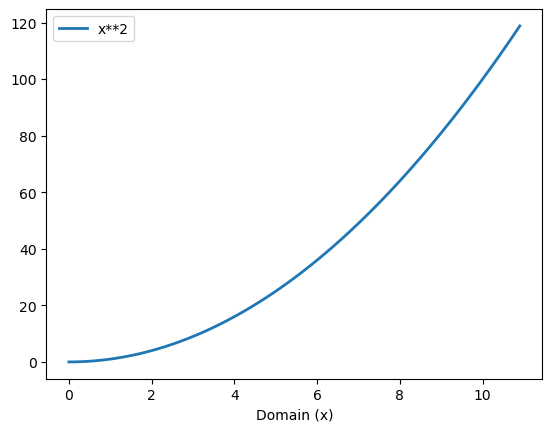

In [5]:
import pandas as pd
table = pd.DataFrame({"Domain (x)": the_domain, "x**2": the_domain**2})
table.plot(x="Domain (x)", y="x**2", lw=2);

The way to think about it might be:  our guiding light is the API called "a scientific calculator" i.e. the topics it unlocks, simply by presenting a set of buttons, with symbols, operators, summarizes thousands of years of accumulated knowledge.  

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/USSR._Calculator._Elektronika_MK-51._Calculator_keyboard.jpg/209px-USSR._Calculator._Elektronika_MK-51._Calculator_keyboard.jpg)

[Attribution](https://commons.wikimedia.org/wiki/File:USSR._Calculator._Elektronika_MK-51._Calculator_keyboard.jpg)

We wish to pass that torch, and are willing to take shortcuts through Python to get to XY plotting quite early, as we would on a scientific calculator.  We take full advantage of Python's interactivity, via its own REPL, and also through Notebook code cells.  One of Guido's first tutorials was called [Using Python as a Calculator](https://docs.python.org/3/tutorial/introduction.html#using-python-as-a-calculator).  Why not make that a graphing calculator?

<a data-flickr-embed="true" href="https://www.flickr.com/photos/51764518@N02/48019610808" title="Vintage Advertising For The Texas Instrument TI-83 Plus Graphing Calculator In An Office Depot Ad In The Palm Beach Post Newspaper (West Palm Beach, Florida), August 15, 2000"><img src="https://live.staticflickr.com/65535/48019610808_7f4ab73633_w.jpg" width="400" height="354" alt="Vintage Advertising For The Texas Instrument TI-83 Plus Graphing Calculator In An Office Depot Ad In The Palm Beach Post Newspaper (West Palm Beach, Florida), August 15, 2000"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

[Attribution](https://flic.kr/p/2gak4jh)

This approach to Python pedagogy (andragogy) will not seem unusual to those encountering Python in an already highly customized niche environment.  You did not learn pure Python, the language, step by step, even though you were going step by step, but with respect to say data science or signal processing.

The goal is not to plod through Python in pedantic fashion, so much as to tour the theme park (math topics = rides) at varying speed.  We vary the pace, from gallop to trot and back, to bring horses into it.  But the scientific calculator meme remains as an anchor, a home base to come back to.

We grow in our appreciation of how these "key topics" all fit together:  number sets, operators, groups, fields, primes, composites, logs, trig, complex numbers, functions, series, solving for unknowns, finding roots and powers, XYZ coordinates, polyhedrons, generating computer graphics.

**Classes Early**

We also get to creating our own Python classes pretty early, relative to more plodding approaches, as the concept of "types with characteristic methods and attributes" is itself a useful mathematical abstraction, and because we're eager to get to "operator overloading" ASAP.

In [6]:
class Python:
    
    def __add__(self, other):
        return "We add"
    
py1 = Python()
py2 = Python()

# py1 + py2 triggers py1.__add__(py2)
py1 + py2  

'We add'

Once we understand the role of special names (or `__ribs__` as we sometimes call them), when it comes to taking responsibility for what the operators do (like `+, -, /, *`), then we're ready to build "math objects" such as the XYZ Vector, Rational Number, and Permutation types.

## The Function and The Set

In the several states of North America, the pre-college curriculum saw a sudden infusion of new rigor in the early 1960s, from specific corners (SMSG, University of Chicago), aimed at bolstering the sophistication of American children.  Elementary schoolers tackled the union and intersection of sets, and in algebra took up "functions" in a more serious and formal way. 

The arithmetic of grocery shopping, savings, managing a farm, was being displaced by what they called the New Math.  Some joked about it, others found it too menacing to be a laughing matter.

In [7]:
foods = set(['🍩', '🍌', '🍪', '🍕'])
desserts = set(['🍩','🍨', '🍰','🍪'])

In [8]:
foods.intersection(desserts)

{'🍩', '🍪'}

In [9]:
foods.union(desserts) # combine without duplicates

{'🍌', '🍕', '🍨', '🍩', '🍪', '🍰'}

In [10]:
desserts.union(foods) == foods.union(desserts)

True

In [11]:
foods.difference(desserts) # foods but not desserts

{'🍌', '🍕'}

In [12]:
desserts.difference(foods) # in desserts but not foods

{'🍨', '🍰'}

In [13]:
desserts.symmetric_difference(foods) # in one but not the other

{'🍌', '🍕', '🍨', '🍰'}

Sets would be our primary data structures going forward and these included the progressively more encompassing, all of them infinite, sets of number types:  

* Counting Numbers, or set $\mathbb{N}$ 
* Whole Numbers $\mathbb{W}$ (add 0 to $\mathbb{N}$)
* Integers $\mathbb{Z}$ (add negatives of positives)
* Rationals $\mathbb{Q}$ (integer:integer ratios)
* Reals $\mathbb{R}$ (no holes)
* Complex numbers (add 2nd root of -1 to $\mathbb{R}$)

each a superset of the next previous.

$$
\mathbb{N} \subset  
\mathbb{W} \subset 
\mathbb{Z} \subset 
\mathbb{Q} \subset 
\mathbb{R} \subset 
\mathbb{C}
$$

The Naturals break up into Primes, Composites and One.  The Reals break up into Rationals and Irrationals, amidst a lot of philosophy.  Irrationals include the Transcendentals.

We use Python's built-in set type, along with the list, tuple and dict types, as one more collection.  Indeed, the sets of numbers are abetted with the set known as Unicode.  Math notation itself comes under scrutiny as a language, expressible in $\LaTeX$.

Functions, a subtype of Relations, define puzzles regarding finding their "roots" or "zeros" along with local "minima" and "maxima".   More generally, they're but mappings, of a domain set to a range set, with [ballistics metaphors implied](https://controlroom.blogspot.com/2006/02/boosting-bandwidth.html). 

The "solution space" would be with respect to one of these number sets, if indeed numbers were at the heart of the solving algorithm.  They may not be.  Some algorithms are only semi-numeric.

Complex numbers give us the ability to find the n roots of an equation to the nth degree.  They give us the complex plane and the ability to visualize fractals.  They integrate deeply with trig, by way of exponentials and logarithms.

## Number Bases

One feature of New Math that was especially controversial was the introduction of number bases as an elementary school topic.  Computers would not be widespread in the home for some decades and the principles of base 2 and base 16 arithmetic, while providing insights into the design of base 10, seemed too much a departure from everyday math for many school districts and parishes.

However in 2022 we have no good reasons to eschew number bases as a topic and gateway to bases 2, 8 and 16 in particular. We wish to describe the bridge between binary to unicode via the ubiquitous UTF-8 for example.  The calendars we study (e.g. proleptic Gregorian) tend to be "mixed base" systems (cite Midhat Gazale).

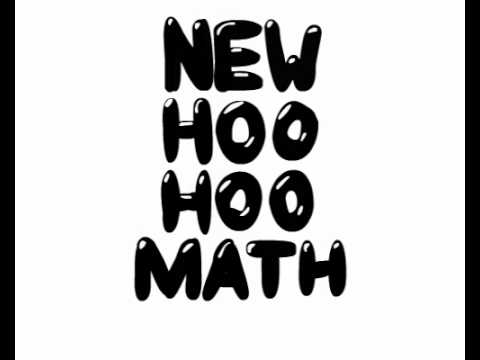

In [14]:
YouTubeVideo("UIKGV2cTgqA") # https://youtu.be/UIKGV2cTgqA

In [15]:
int('FF', 16)

255

In [16]:
pizza = [bin(byte) for byte in list(bytes('🍕', encoding='utf8'))]
pizza

['0b11110000', '0b10011111', '0b10001101', '0b10010101']

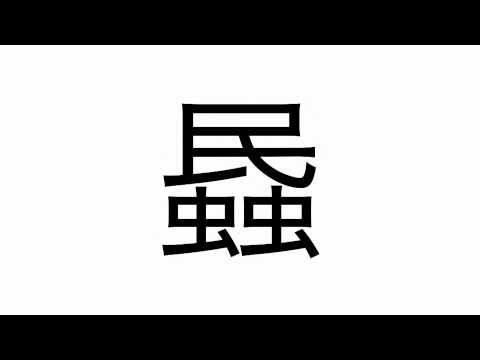

In [17]:
YouTubeVideo("Z_sl99D2a18") # https://youtu.be/Z_sl99D2a18

## Composition of Functions

Given we're diving deeper into Python, even as we dive more deeply into mathematics, we may take advantage of this opportunity to introduce decorator syntax.  By using a decorator class and operator overloading, we may turn ordinary functions into composable objects.

In [18]:
class Composable:
    
    def __init__(self, f):
        self.f = f
        
    def __call__(self, arg):
        return self.f(arg)
    
    def __mul__(self, other):
        return Composable(lambda x: other(self(x)))

In [19]:
@Composable
def g(m):
    return 2 * m

@Composable
def h(m):
    return m ** 2

# h = Composable(h) <-- what decorator syntax replaces

In [20]:
(g * h * h * g * h)(10)  # making a pipeline

102400000000

In [21]:
g(h(10))

200

In [22]:
h(g(10))

400

In [23]:
(g * h)(10)  # apply g then h to the result

400

In [24]:
t = h * g
t(10)

200

In [25]:
@Composable
def q(x):
    return x

In [26]:
q(10)

10

In [27]:
(q * q)(3)

3

## Primes and Composites

Some high school mathematics curricula are in a hurry to get to precalculus and calculus, by way of the real numbers $\mathbb{R}$. Topics in Number and Group Theory might be offered in the elective category, under the generic heading of Discrete Mathematics.

With the rise of digital processing and cryptography, we can make the case that RSA and/or some other public key cryptography algorithm should be leveraged for what it might teach us about Discrete Mathematics.

The importable `primes` shown below is installed as a package, meaning it's a subfolder somewhere along the Python search path, with an internal `__init__.py` file.

In [28]:
import primes
print(dir(primes))

['PrimeNumbers', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'all_factors', 'eratosthenes', 'euler_test', 'factors', 'invmod', 'isprime', 'primes_gen', 'primesplay', 'xgcd']


Lets take a lot at this `__init__.py` file. These do not have to contain code.  Their mere presence is enough to make a subfolder importable.  However, by adding code, we are able to craft the namespace the importer will receive.  

Compare the output from `dir(primes)` above to the Python source code below.  

```python
    # %load ./primes/__init__.py
    """
    factors(n): returns n's factors: (1, prime factors) 
                or (-1, prime factors)
    isprime(n): returns bool re n's primehood
    eratosthenes(n): list of primes up to n
    PrimeNumbers: a prime numbers generator / iterator
    """

    from primes.primesplay import factors, isprime, all_factors, eratosthenes
    from primes.primes_gen import PrimeNumbers
    from primes.euler_test import xgcd, invmod
```

In [29]:
primes.isprime(392201)

True

Feel free to eyeball all of the source code files.  There's much we could learn from each one of them.  Some will be discussed in more detail by your teachers, depending on the focus of a daily lesson plan.  Perhaps today is a day to review the Sieve of Erastosthenes, an algorithm of elimination, starting with a table of consecutive integers from 1 (which is not prime).

Definition of a prime number:  Prime numbers elements of $\mathbb{N}$ greater than 1 with only two factors: 1 and the number itself. This means these numbers cannot be divided by any *other* elements of $\mathbb{N}$ without leaving a remainder.  

Primes imagined as lengths, of metal or wood, cannot be divided into equal whole number lengths, except by the unit length itself.  

A plank of 17 meters cannot be divided into multiple lengths each the same whole number of meters, except of one meter.

A plank of 12 meters, in contrast, might be divided into 4 planks of 3 meters each, or 3 planks of 4 meters, or 2 of 6 meters, in addition to 12 of 1 meter.

This is why we call 17 a prime number, but not 12.  12 is a composite number.

Positive integers with more than 2 factors are known as composite numbers.

In [30]:
primes.factors(7482881)

(1, 7, 677, 1579)

In the case of RSA, the public key crypto algorithm named for Rivest–Shamir–Adleman, we have Fermat's Little Theorem and Euler's theorem regarding the totient, i.e. the number of totatives of a number N, to think about.  

Defining totatives requires knowing about the GCD, at which point we introduce Euclid's Method, one of the oldest algorithms on the books.  This Notebook is more of a summary guide to a curriculum, with more fleshed out notebooks treating these topics.  

Euclid's Method in turn anchors a number of topics, including its own extended version.

For example, RSA uses Euclid's Extended Method, an enchancement of the ordinary GCD finder that also helps us find a number's multiplicative inverse where operations are modulo N.

## Modulo Arithmetic

Would this be an opportune time to introduce a type of number that as a built-in modulus?  We could get started, adding more frills in future spirals.

In [31]:
from math import gcd 

def totatives(n : int) -> list[int]:
    return [i for i in range(1, n) if gcd(i, n)==1]

def totient(n):
    return len(totatives(n))

In [32]:
print(totatives(100))

[1, 3, 7, 9, 11, 13, 17, 19, 21, 23, 27, 29, 31, 33, 37, 39, 41, 43, 47, 49, 51, 53, 57, 59, 61, 63, 67, 69, 71, 73, 77, 79, 81, 83, 87, 89, 91, 93, 97, 99]


In [33]:
totient(100)

40

In [34]:
class Mod:
    """
    Integers operating relative to a _modulus.
    """
    _modulus = 12
    
    def __init__(self, n):
        self.p = n % self._modulus
        
    def __add__(self, other):
        return Mod(self.p + other.p)
    
    def __mul__(self, other):
        return Mod(self.p * other.p)
    
    def __pow__(self, e):
        new_p = self.p
        if e < 0:
            new_p = primes.invmod(self.p, self._modulus)
        e = abs(e)
        return Mod(pow(new_p, e, self._modulus))
    
    def __eq__(self, other):
        return self.p == other.p
    
    def __lt__(self, other):
        return self.p < other.p
    
    def __hash__(self):
        return 0
    
    def __repr__(self):
        return "({} mod {})".format(self.p, self._modulus)

In [35]:
p = Mod(4)
q = Mod(3)

In [36]:
p * q

(0 mod 12)

In [37]:
q ** 5

(3 mod 12)

Speaking of "frills" (upon spiralling), since this curriculum is about leveraging math concepts to dive deeper into Python (in addition to diving deeper into math concepts with support from the Python language) here is a logical place to introduce the Pythonic idea of a "context" as in "context manager".

The keyword `with` in front of an object triggers its `__enter__` method, whereas exiting the block of code indented under a with statement, triggers `__exit__`.  The idea here being:  create a temporary context, perhaps restoring to a default.  In this case, the temporary context features a different modulus inside of Mod.

Context managers, as a topic, sit apart from run of the mill workaday Python, at a deeper level.  What's deep in this picture may not be the idea of a modulus (familiar mathematics by this time) but that of a context manager.

In [38]:
class Modc:
    """
    set the Mod._modulus going in, sets it back going out
    """
    
    def __init__(self, mod):
        self.oldmod = Mod._modulus  # store for later
        self.newmod = mod           # the modulus for this context
        Mod._modulus = mod
        
    def __enter__(self):
        return self  # not needed internally to the scope
        
    def __exit__(self, *oops):
        # handles any exceptions raised within the context (scope of with statement)
        Mod._modulus = self.oldmod  # revert to previous modulus
        if oops[0]:
            print(type(oops[1]))
            raise oops[1]
        return True

In [39]:
with Modc(12):
    a = Mod(10)
    b = Mod(11)
    print(a * b)

(2 mod 12)


In [40]:
a + b

(9 mod 12)

In [41]:
a * b

(2 mod 12)

In [42]:
a * a * a * a

(4 mod 12)

In [43]:
G = [Mod(i) for i in totatives(12)]
G

[(1 mod 12), (5 mod 12), (7 mod 12), (11 mod 12)]

In [44]:
set([i * j for i in G for j in G])  # all totatives x all totatives give totatives (closure)

{(1 mod 12), (5 mod 12), (7 mod 12), (11 mod 12)}

In [45]:
with Modc(20):
    a = Mod(10)
    b = Mod(11)
    print(f"a * b mod {Mod._modulus} = ", a * b)
    G = [Mod(i) for i in totatives(20)]
    print("Totatives:", G)

a * b mod 20 =  (10 mod 20)
Totatives: [(1 mod 20), (3 mod 20), (7 mod 20), (9 mod 20), (11 mod 20), (13 mod 20), (17 mod 20), (19 mod 20)]


In [46]:
a * b  # Mod._modulus back to 12 thanks to exiting context

(2 mod 12)

In [47]:
# everyone has an inverse
with Modc(20):
    G = [Mod(i) for i in totatives(20)]
    for elem in G:
        print(f"{elem} * {elem**-1} = {elem * elem**-1}")

(1 mod 20) * (1 mod 20) = (1 mod 20)
(3 mod 20) * (7 mod 20) = (1 mod 20)
(7 mod 20) * (3 mod 20) = (1 mod 20)
(9 mod 20) * (9 mod 20) = (1 mod 20)
(11 mod 20) * (11 mod 20) = (1 mod 20)
(13 mod 20) * (17 mod 20) = (1 mod 20)
(17 mod 20) * (13 mod 20) = (1 mod 20)
(19 mod 20) * (19 mod 20) = (1 mod 20)


We might write Modc another way.  Instead of as a class with `__enter__` and `__exit__` methods, the contextlib library will allow decorated generator syntax to perform the same services.  

Using a math concept to help unify the context manager and generator concepts in Python, is a good example of leveraging math fluency to improve Python fluency.

In [48]:
from contextlib import contextmanager

@contextmanager
def Modcg(mod):
    # do what __enter__ does
    oldmod = Mod._modulus  # store for later
    newmod = mod           # the modulus for this context
    Mod._modulus = mod
    try:
        yield  # yield control back to the indented scope
    finally:
        # finish up, as in __exit__
        Mod._modulus = oldmod  # revert to previous modulus

In [49]:
# everyone has an inverse
with Modcg(13):
    G = [Mod(i) for i in totatives(20)]
    for elem in G:
        print(f"{elem} * {elem**-1} = {elem * elem**-1}")

(1 mod 13) * (1 mod 13) = (1 mod 13)
(3 mod 13) * (9 mod 13) = (1 mod 13)
(7 mod 13) * (2 mod 13) = (1 mod 13)
(9 mod 13) * (3 mod 13) = (1 mod 13)
(11 mod 13) * (6 mod 13) = (1 mod 13)
(0 mod 13) * (0 mod 13) = (0 mod 13)
(4 mod 13) * (10 mod 13) = (1 mod 13)
(6 mod 13) * (11 mod 13) = (1 mod 13)


## Pascal's Triangle

While still in the realm of integers and Number Theory, at the beginning stages of many topics, we introduce number sequences and series in connection with ball packing and Pascal's Triangle.

By ball packing, I mean number sequences with geometric interpretations, ala the figurate and polyhedral numbers, as taken up in *The Book of Numbers* by Conway and Guy, and under the heading of *Gnomon* by Midhat Gazale.

Triangular and square numbers, tetrahedral numbers, all appear in Pascal's triangle.  Even the Fibonacci numbers may be found.

[Pascal's Triangle](PascalsTriangle.ipynb) serves as our jumping off point into talk of the normal and standard normal distribution, a histogram approaching a bell curve as we go to some limit.

Regarding Primes and Composities, we know that rows of Pascal's triangle that divide evenly by the row number, are prime, though we may not have a proof at the high school level, only inductive evidence based in computation.

In [50]:
def pascal(n):  
    """
    return the nth row of Pascal's triangle
    """
    row = [1]
    i = 0
    while i < n:
        i += 1
        row = [i+j for i,j in zip(row+[0], [0]+row)]
    return row

In [51]:
pascal(3)

[1, 3, 3, 1]

Pascal's Triangle has long been a primary excuse to introduce the Python generator structure.  What is that?

The keyword yeild hands an object back to the caller and suspends execution of the generator, but without losing its place, meaning the caller has the means to "revive" a generator -- next(g) -- and have it continue execution right where it left off.

In effect, this means you have an iterator, the kind of object you are free to loop over.

In [52]:
def gen_pascal():  
    """
    generate successive rows of Pascal's triangle
    """
    row = [1]
    i = 0
    while True:
        yield row
        i += 1
        row = [i+j for i,j in zip(row+[0], [0]+row)]

In [53]:
gp = gen_pascal()  # gp - generator for pascal's triangle

In [54]:
for _ in range(10):
    print(next(gp))  # next triggers:  run to the next encounter with yield

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]


In [55]:
gp = gen_pascal()  # starting over with a fresh generator
for row in gp:
    print(row)
    if len(row) > 13:
        break

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]
[1, 5, 10, 10, 5, 1]
[1, 6, 15, 20, 15, 6, 1]
[1, 7, 21, 35, 35, 21, 7, 1]
[1, 8, 28, 56, 70, 56, 28, 8, 1]
[1, 9, 36, 84, 126, 126, 84, 36, 9, 1]
[1, 10, 45, 120, 210, 252, 210, 120, 45, 10, 1]
[1, 11, 55, 165, 330, 462, 462, 330, 165, 55, 11, 1]
[1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1]
[1, 13, 78, 286, 715, 1287, 1716, 1716, 1287, 715, 286, 78, 13, 1]


The triangular and tetrahedral sequences are columns 2, 3 starting from column 0. In other words, 1, 3, 6, 10... represent triangles of like ping pong balls or whatever, and 1, 4, 10, 20... an accumulation of triangular numbers, coming down from 1 at the apex (1, 1+3, 1+3+6, 1+3+6+10...).  Given how Pascal's Triangle is generated, accumulating accumulations is the name of the game.

Sequences describe balls packing on a flat surface, spatially, even hollowly (successive layers).  The cuboctahedron shape, for example, emerges as 12 balls around a central one, and then successive layers of 42, 92, 162... i.e. 10 * L * L + 2, where L = layer number (when L=1, we have 12 balls).

Lets revisit the result that if row n divides evenly into all other numbers in the same row (but for the number 1), then n is prime.  For example, row 5 is \[1, 5, 10, 10, 5, 1\] and 5 divides without remainder into all those number but the 1s.  Therefore 5 is prime.

In [56]:
# get primes
p = gen_pascal()
for i in range(100):
    row = next(p)
    if i >= 2:
        row_num = row[1] # column 1
        # print(i, sum(row[1:-1]))
        if 0 == sum(row[1:-1]) % i: # exclude 1st and last
            print(i, end=", ")      # print if no remainder (row number divides evenly)

2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 

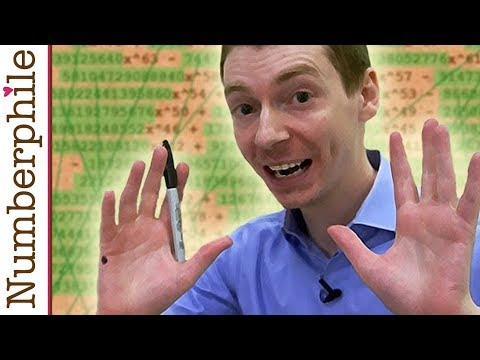

In [57]:
YouTubeVideo("HvMSRWTE2mI") # https://youtu.be/HvMSRWTE2mI

## The Rational Numbers

A first or second excuse to introduce operator overloading and to code a substantial "math object" comes with the rational numbers of Fraction type.  

Python has a fractions.Fraction in the Standard Library, along with math.gcd, but neither need not stop us from using our own code.

We may start writing a own Rational Number class, which keeps track of the integer numerator and denominator.

In [58]:
from fractions import Fraction

In [59]:
from math import gcd

class Rat:
    
    def __init__(self, p, q):
        GCD = gcd(p,q)
        self.p = p//GCD
        self.q = q//GCD
        
    def __mul__(self, other):
        return Rat(self.p * other.p, self.q * other.q)
    
    def __truediv__(self, other):
        pass
    
    def __add__(self, other):
        new_p = self.p * other.q + other.p * self.q
        new_q = self.q * other.q  # common denominator
        return Rat(new_p, new_q)
    
    def __pow__(self, e):
        if e < 0:
            new_p = self.q
            new_q = self.p
        else:
            new_p = self.p
            new_q = self.q
        e = abs(e)
        return Rat(new_p ** e, new_q ** e)
            
    def __neg__(self):
        return Rat(-self.p, self.q)
    
    def __sub__(self, other):
        return self + (-other)
    
    def __repr__(self):
        return '({}/{})'.format(self.p, self.q)

In [60]:
f1 = Rat(10, 30)
f2 = Rat(1, 2)

In [61]:
f1

(1/3)

In [62]:
f2 * f1

(1/6)

In [63]:
f1 + f2

(5/6)

In [64]:
f1 - f2

(-1/6)

In [65]:
f2

(1/2)

In [66]:
(f2**-1) * f2

(1/1)

## The Polynomial

Anyone flipping through high school textbooks from the last 100 years, is likely to be impressed the polynomials form a salient concept.  We learn to factor them, the find their roots, to plot them, the add, multiply, subtract and divide them.

Polynomials introduce maths in a competitive format, featuring the mathematicians of the Italian Renaissance in [factoring face-offs](https://web.math.utk.edu/~cartwright/iaawa/section-poly-factorization.html).

In [67]:
import sympy as sp

Over on Math Forum (math-teach archives) I advocated for a No Child Left Behind polynomial, somewhat tongue in cheek, yet I was serious about wanting to get $\phi$ in the action early.  We use it often.

In [68]:
φ = sp.Symbol('φ')
equation = sp.Eq(φ/1, (φ+1)/φ) # 1 is to φ as φ is to x + 1
equation

Eq(φ, (φ + 1)/φ)

In [69]:
ans = sp.solve(equation)
ans

[1/2 - sqrt(5)/2, 1/2 + sqrt(5)/2]

In [70]:
ans[1].evalf()

1.61803398874989

In [71]:
sp.S.GoldenRatio.n(20)

1.6180339887498948482

In [72]:
from sympy.abc import *

In [73]:
expr = a*x**2 + b*x + c
expr

a*x**2 + b*x + c

In [74]:
sp.solve(expr, x)

[(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]

Shall we write our own Polynomial class?  That's definitely doable.

## The Permutation

In how many distinct orders might a deck of 52 be shuffled?  

Every card is unique.  We have 52 to choose from for the first card, with one of 51 remaining for the second and so on:  52 * 51 * 50 ... * 1.  That's an astronomically large number: 52 factorial or $52!$ or....

In [75]:
import math
math.factorial(52)  # showing off Python's arbitrary length int type

80658175170943878571660636856403766975289505440883277824000000000000


Permutations take us into Combinatorics, and are also our bridge into Abstract Algebra, wherein permutations come in groups, i.e. with a binary group operation. They also come with a unary operator for obtaining the inverse of any element.

Assuming the object oriented paradigm is going to stay relevant, Python's way of doing operator overloading comes into play with the P type.  We'll want to defind `__mul__` and several other operators using "magic methods" or "special names" (same thing).

A permutation might map the letters 'a-z' (lowercase ascii) plus space, to that same set in a different order, one-to-one.  That's a permutation, or "shuffle" of the 27 elements 'a-z' + space.

Permutation objects are a lot like dictionaries in associated every key with a corresponding value.

In [76]:
from px_class import P

In [77]:
p = P().shuffle()
q = P().shuffle()
e = P()

To multiply two permutations is to conjoin their mappings, thereby composing them: 

Option 1:  Do p to x, then q the result.

* if $p[x] \rightarrow y$ and 
* $q[y] \rightarrow z$ then 
* $(p * q)[x] \rightarrow z$

Or sometimes it's the other way around:

Option 2:  Do q to x, then p the result.

* if $q[x] \rightarrow y$ and 
* $p[y] \rightarrow z$ then 
* $(p * q)[x] \rightarrow z$

We go with option 1 with the P class inside of `px_class.py`.

In [78]:
y = p['a']
z = q[y]
z

' '

In [79]:
(p * q)['a']

' '

In [80]:
p['a']  

'p'

In [81]:
q[p['a']] 

' '

In [82]:
(p * q)['a']

' '

In [83]:
(~q * q) == e

True

In [84]:
c = q("letter substitution code")
c

'hbyybcqnjgnypyjyptmqutsb'

In [85]:
(~q)(c)

'letter substitution code'

In [86]:
q.cyclic()

(('a',
  'o',
  't',
  'y',
  'f',
  'd',
  's',
  'n',
  'm',
  'z',
  'x',
  'w',
  'l',
  'h',
  'r',
  'c',
  'u',
  'j'),
 ('b', 'g', 'i', 'p', ' ', 'q', 'k', 'e'),
 ('v',))

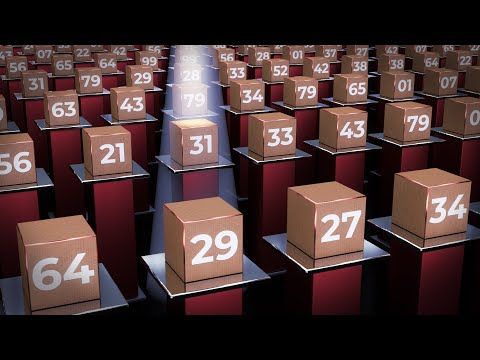

In [87]:
YouTubeVideo("iSNsgj1OCLA") # https://youtu.be/iSNsgj1OCLA

## The Vector

High school math has conventionally introduced (x, y) and (x, y, z) coordinates twice, the first time without vector notation, the second time with.

Given an object oriented computer language, why not start with Vectors?  

Introduce operator overloading and implement vector addition and subtraction, along with scalar multiplication and division.

Expand to include dot and cross products.

In [88]:
# %load -s Vector pov.py
class Vector:
    
    def __init__(self, x, y, z):
        self.v = np.array((x, y, z))
        
    def __add__(self, other):
        v_sum = self.v + other.v
        return type(self)(*v_sum)
    
    def __neg__(self):
        return -1 * self
    
    def __sub__(self, other):
        v = self.v + (-other.v)
        return type(self)(*v)
                      
    def __mul__(self, scalar):
        v = scalar * self.v
        return type(self)(*v)
    
    def dot(self, other):
        return sum([i * j for i, j in zip(self.v, other.v)])
    
    # scalar on the left: s * Vector -> Vector.__rmul__(s)
    __rmul__ = __mul__
    
    def __truediv__(self, scalar):
        new_v = (1/scalar) * self.v
        return type(self)(*new_v)
    
    def normalize(self):
        if self.length != 0:
            return type(self)(*(self.v/self.length))
        else:
            return type(self)((0,0,0))
    
    @property
    def length(self):
        x, y, z = self.v
        return np.sqrt(self.dot(self))
    
    def __repr__(self):
        return 'Vector({},{},{})'.format(*self.v)

## The Triangle

With a coordinate system implied, and vectors present, we have everything we need to introduce triangles, along with the trigonometric functions.  

A popular convention we might adopt is to label the angles A, B, C opposite the corresponding edges a, b, c.  If one of the angles is a right angle, have it be angle C by convention, the included angle between legs a and b, and opposite hypotenuse c.

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52094878384/in/photolist-2nnrSom-2mrcdVt" title="pentatrig"><img src="https://live.staticflickr.com/65535/52094878384_dc38015da5_o.jpg" width="320" height="290" alt="pentatrig"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>


The Triangle type below is initialized by sides a, b, c.  It stores these lengths "privately" (using \_a, \_b, \_c) with single underline prefixes. The property decorator allows "get attribute" syntax to spin some wheels, meaning getting these values, without calling anything, triggers a corresponding method.

The use of the property decorator falls under "deep Python".

[Trig and Complex Numbers](Trig.ipynb)

In [89]:
from math import acos, degrees, sqrt

class Triangle:
    
    def __init__(self, a, b, c):  # side, side, side
        self._a = a
        self._b = b
        self._c = c
    
    @property
    def area(self):
        "Heron's Formula"
        a = self.a
        b = self.b
        c = self.c
        s = self.perimeter/2
        return sqrt(s*(s-a)*(s-b)*(s-c))
    
    @property
    def perimeter(self):
        return self.a + self.b + self.c
    
    @property
    def A(self):
        a = self.a
        b = self.b
        c = self.c
        return degrees(acos((b**2 + c**2 - a**2)/2*b*c))
    
    @property
    def B(self):
        a = self.a
        b = self.b
        c = self.c
        return degrees(acos((a**2 + c**2 - b**2)/2*a*c))
    
    @property
    def C(self):
        a = self.a
        b = self.b
        c = self.c
        return degrees(acos((a**2 + b**2 - c**2)/2*a*b))

    @property
    def a(self):
        return self._a
    
    @property
    def b(self):
        return self._b
    
    @property
    def c(self):
        return self._c
    
    def __repr__(self):
        return f"Triangle({self.a}, {self.b}, {self.c})"

In [90]:
t = Triangle(3, 4, 5)
t

Triangle(3, 4, 5)

In [91]:
t.C

90.0

In [92]:
t.area

6.0

## Computer Graphics

Once we're in the space of spatial vectors, a next challenge is to phase in computer graphics, by way of the polyhedrons. Ray tracing with [POV-Ray](https://www.povray.org) has been a focus of [the Oregon Curriculum Network](http://4dsolutions.net/ocn/numeracy0.html) since the 1990s. 

Google Colab will not be able to process the POV files generated in this section.  Install [POV-Ray](https://flic.kr/s/aHsiVEpzYU) locally to take full advantage of the 3D graphics framework developed herein.

![povray camera](http://www.povray.org/documentation/3.7.0/images/f/fd/RefImgPerspcam.gif)

Vectors with a shared tail at the origin fan out to give the surface features of a polyhedron, in terms of Edges (pairs of vectors) and Faces (cycles of Edges).

In [93]:
# used to recompile pov when developing
import pov
import imp
imp.reload(pov)

<module 'pov' from '/Users/kirbyurner/Documents/elite_school/pov.py'>

Much of the relevant source code, including the Tetrahedron and Polyhedron types, lives submerged in [pov.py](pov.py).  

The subclasses of Polyhedron include the faces as a tuple of tuples.  The faces get distilled into edges, pairs of POV_Vectors.  For example, face `('a', 'b', 'c')` would distill into edges `POV_Edge('a', 'b')`, `POV_Edge('b', 'c')` and `POV_Edge('a', 'c')`.

In [94]:
from pov import POV_Vector, Tetrahedron, InvTetrahedron

In [95]:
# Tetrahedron
a = POV_Vector(x =  0.35355339059327373, 
               y =  0.35355339059327373, 
               z =  0.35355339059327373)

b = POV_Vector(x = -0.35355339059327373, 
               y = -0.35355339059327373, 
               z =  0.35355339059327373)
           
c = POV_Vector(x = -0.35355339059327373, 
               y =  0.35355339059327373, 
               z = -0.35355339059327373)
           
d = POV_Vector(x =  0.35355339059327373, 
               y = -0.35355339059327373, 
               z = -0.35355339059327373)

In [96]:
a, -a, a+b, a-b, 3*a

(POV_Vector(0.35355339059327373,0.35355339059327373,0.35355339059327373),
 POV_Vector(-0.35355339059327373,-0.35355339059327373,-0.35355339059327373),
 POV_Vector(0.0,0.0,0.7071067811865475),
 POV_Vector(0.7071067811865475,0.7071067811865475,0.0),
 POV_Vector(1.0606601717798212,1.0606601717798212,1.0606601717798212))

In [97]:
x = POV_Vector(2, 0, 0)
y = POV_Vector(0, 1.5, 0)
z = POV_Vector(0, 0, 1.5)
origin = POV_Vector(0,0,0)
    
with open("four_vectors.pov", "w") as output:
    print(pov.pov_header, file=output)  # print to the output file
    colors = ("rgb <1, 0.4, 0>",
              "rgb <1, 0, 0>",
              "rgb <0, 1, 0>",
              "rgb <0, 0, 1>")

    # XYZ apparatus
    origin.draw_vert("rgb <0, 0, 0>", 0.1, output)
    for v in (x, y, z, -x, -y, -z):
        v.draw_edge("rgb <66/255, 224/255, 245/255>", 
                    0.01, 
                    output)
        
    for idx, v in enumerate((a,b,c,d)):
        v.draw_edge(colors[idx], 0.03, output)
        v.draw_vert(colors[idx], 0.05, output)
        
print("four_vectors.pov ready for rendering")

four_vectors.pov ready for rendering


<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52141879420/in/dateposted-public/" title="four_vectors"><img src="https://live.staticflickr.com/65535/52141879420_ca320dc9d5_z.jpg" width="640" height="485" alt="four_vectors"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

The vertexes have string letter labels.  Pairing them with actual vectors involves passing a dictionary upon initializing an instance, as shown below:

In [98]:
t = Tetrahedron(verts={'a':a, 'b':b, 'c':c, 'd':d}) # labels with vectors
t.faces # already hard-wired

(('a', 'b', 'c'), ('a', 'c', 'd'), ('a', 'd', 'b'), ('b', 'c', 'd'))

In [99]:
e,f,g,h     = b+c+d, a+c+d, a+b+d, a+b+c 
t_inv = InvTetrahedron(verts={'e':e, 'f':f, 'g':g, 'h':h}) 
t_inv.faces

(('e', 'f', 'g'), ('e', 'g', 'h'), ('e', 'h', 'f'), ('f', 'h', 'g'))

Here is one of the tetrahedron's POV_Edge objects, containing a pair of POV_Vector type objects.

In [100]:
print("{edge.v0}\n{edge.v1}".format(edge = t.edges[0]))

POV_Vector(0.35355339059327373,0.35355339059327373,0.35355339059327373)
POV_Vector(-0.35355339059327373,-0.35355339059327373,0.35355339059327373)


 The POV_Edge type has its own `draw_edge` method for writing the corresponding scene description language, just as POV_Vector has `draw_vert`:

```python

    def draw_vert(self, c, r, outfile): 
        vert = "< {}, {}, {} >".format(*self.v)
        template = ("sphere {{ {}, {} texture "
                    "{{ pigment {{ color {} }} }} no_shadow }}") 
        print(template.format(vert, r, c), file=outfile)
```


In [101]:
t.edges[0].draw_edge(c='rgb <1,0,0>', r=0.03) # output to POV-Ray file

cylinder { < 0.35355339059327373, 0.35355339059327373, 0.35355339059327373 >, < -0.35355339059327373, -0.35355339059327373, 0.35355339059327373 >, 0.03 texture {pigment { color rgb <1,0,0> } } no_shadow }


The [pov](pov.py) module contains a lengthy triple quoted string named `pov_header` that sets up the camera, lighting, and [sky sphere](http://www.povray.org/documentation/view/3.7.1/91/), using Scene Description Language for POV-Ray.

With an output file open, the polyhedron subclasses add their vertexes and edges into it, after the canned, possibly hand-edited, header.

In [102]:
with open("render_me.pov", 'w') as output:
    print(pov.pov_header, file=output)  # print to the output file
    t.edge_color =  "rgb <1, 0, 0>"
    t.vert_color =  "rgb <0, 0, 1>" 
    t.render(output)                    # t inherits Polyhedron.render
    
print("render_me.pov ready for rendering")

render_me.pov ready for rendering


In [103]:
! /usr/local/bin/povray +A +H768 +W1024 -GA ./render_me.pov

/bin/bash: /usr/local/bin/povray: No such file or directory


<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52131603577/in/dateposted-public/" title="render_me"><img src="https://live.staticflickr.com/65535/52131603577_a845ff6ac7_z.jpg" width="640" height="480" alt="render_me"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

In this curriculum, once the topic of Polyhedrons is broached, we take the liberty of diving into Americana associated with the polymath inventor Buckminster Fuller.  Depending how far down that rabbit hole we want to go, we have the option of introducing [Quadray Coordinates](https://en.wikipedia.org/wiki/Quadray_coordinates) and learning the Vector stuff a second time from another perspective.

In particular, we might use Quadrays to [generate the CCP](https://nbviewer.org/github/4dsolutions/Python5/blob/master/Generating%20the%20FCC.ipynb) (cubic close packing).

<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/479693571/in/photolist-2ndRLQZ-2nbQMuQ-2mskcxr-2m29ojG-2m29ok8-2j8odSY-2fn4VBT-8thDyL-8ryECF-8iYyKN-7eU7h4-JoybP-Joybi" title="Rhombic Dodecahedra"><img src="https://live.staticflickr.com/190/479693571_ff580af964_m.jpg" width="240" height="234" alt="Rhombic Dodecahedra"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

## Linear Algebra

Plain vanilla high school mathematics curricula may avoid Linear Algebra is a formal topic, yet develop students' familiarity with vector space concepts nontheless.  XYZ, the coordinate system, is by itself an introduction to linear algebra concepts.

In this curriculum, one motivation for learning "matrix times vector" mechanics is to apply **rotation matrices** to a Polyhedron. 

At the more theoretical level, our objective is to build a glossary, so that when students encounter matricies again, they're not all together mystified by such terms as inverse, transpose, complex conjugate.  

Since we already have the beginnings of Group Theory in view, we might at least get to [the Pauli matrices](MatrixMath.ipynb). 

A matrix is "unitary" if its inverse is likewise its conjugate transpose, and "special unitary" if unitary where determinants all equal 1.

We might expect an overlapping physics curriculum to pick it up at this point, as the Standard Model employs both SU(2) and SU(3).  

This need not happen in high school, although we do visit the topic of [radioactive decay](http://nbviewer.org/github/4dsolutions/School_of_Tomorrow/blob/master/isotope_decay.ipynb) in our School of Tomorrow.

We also may use the determinant of a matrix to study [Polyhedron volumes](TheCabal.ipynb).

Enter `sympy`, a computer assisted algebra (CAS) package for Python.  Our algorithms may be expressed using more conventional algebraic notation, including with customary Greek letters such as $\theta$.

In [104]:
import sympy as sp

In [105]:
θ = sp.Symbol('θ')

In [106]:
Rx = sp.Matrix([[1, 0, 0], 
               [0, sp.cos(θ), -sp.sin(θ)], 
               [0, sp.sin(θ), sp.cos(θ)]])
Rx

Matrix([
[1,      0,       0],
[0, cos(θ), -sin(θ)],
[0, sin(θ),  cos(θ)]])

In [107]:
Ry = sp.Matrix([[sp.cos(θ), 0, sp.sin(θ)], 
               [0, 1, 0], 
               [-sp.sin(θ), 0, sp.cos(θ)]])
Ry

Matrix([
[ cos(θ), 0, sin(θ)],
[      0, 1,      0],
[-sin(θ), 0, cos(θ)]])

In [108]:
Rz = sp.Matrix([[sp.cos(θ), -sp.sin(θ), 0],
                [sp.sin(θ),  sp.cos(θ), 0],
                [0, 0, 1]])
Rz

Matrix([
[cos(θ), -sin(θ), 0],
[sin(θ),  cos(θ), 0],
[     0,       0, 1]])

In [109]:
a.v

array([0.35355339, 0.35355339, 0.35355339])

In [110]:
v = sp.Matrix(a.v)
v

Matrix([
[0.353553390593274],
[0.353553390593274],
[0.353553390593274]])

In [111]:
Rx * v

Matrix([
[                                   0.353553390593274],
[-0.353553390593274*sin(θ) + 0.353553390593274*cos(θ)],
[ 0.353553390593274*sin(θ) + 0.353553390593274*cos(θ)]])

In [112]:
from math import degrees, radians

In [113]:
radians(90)

1.5707963267948966

In [114]:
(Rx * v).evalf(subs={'θ':radians(10)})

Matrix([
[0.353553390593274],
[0.286788218175523],
[0.409576022144496]])

In the algorithm below, a single vector, the one named `a`, is copied and then progressively rotated and updated by n degrees, with snapshots aggregating in a .pov file for rendering.  POV_Vectors know how to describe themselves in scene description language, as do POV_Edges.

In [115]:
the_vector = a.copy()
# POV-Ray
edge_color = "rgb <1, 0.4, 0>"
edge_radius= 0.03
vert_color = "rgb <0, 0, 1>"
vert_radius= 0.05

with open("rotate_me.pov", "w") as output:
    print(pov.pov_header, file=output)  # print to the output file

    # show origin (black hole) and positive x towards us
    origin.draw_vert("rgb <0, 0, 0>", 0.1, output)
    x.draw_edge("rgb <66/255, 224/255, 245/255>", 0.01, output)
    the_vector.draw_edge(edge_color, edge_radius, output)
    the_vector.draw_vert(vert_color, vert_radius, output)
    for _ in range(35):
        v = sp.Matrix(the_vector.v)
        v = (Rx * v).evalf(subs={'θ':radians(10)}) # rotate by n degrees
        the_vector = POV_Vector(v[0], v[1], v[2])  # update the_vector
        the_vector.draw_edge(edge_color, edge_radius, output)
        the_vector.draw_vert(vert_color, vert_radius, output)
print("rotate_me.pov ready for rendering")

rotate_me.pov ready for rendering


<a data-flickr-embed="true" href="https://www.flickr.com/photos/kirbyurner/52142229719/in/dateposted-public/" title="Rotate Vector by Increments of 10 Degrees"><img src="https://live.staticflickr.com/65535/52142229719_a1dd0bf765_z.jpg" width="640" height="494" alt="Rotate Vector by Increments of 10 Degrees"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

## Plotting

A function we usually come to, as a pre-requisite for calculus, is the polynomial.  

Before we integrate or differentiate such a curve, we learn to (a) plot it on graph paper (i.e. the screen) and (b) to find its roots, or zeros.

Plain old Python (pop) doesn't have the `linspace` or `arange` though one might code them in pure Python. Instead, why not introduce "array based computing" at the outset, with an eye towards syncing with data science tutorials and the broader Python ecosystem?  Other languages are array-based as well, enabling jumping to other languages, such as J.

The numpy package provides a context for a new kind of list object, the n-dimensional array, suitable for navigating amidst n-d polytopes (Coxeter) if that's your gig.  A lot of us stay with row by column matrix-like data structures, 2-dimensional.

In [116]:
import numpy as np
import matplotlib.pyplot as plt

Chop a number line (like making sausage) into 200 points exactly, so 199 intervals, starting and ending on the two points you give it.  Return an n-d array of only one dimension, as shown by `obj.shape`.

In [117]:
rat_domain = np.linspace(-5, 5, 200)  # rational domain, expressed in floating points

In [118]:
print("Length: ", len(rat_domain))
print("d-type: ", rat_domain.dtype)
print(" Shape: ", rat_domain.shape)
print("   Dim: ", rat_domain.ndim)

Length:  200
d-type:  float64
 Shape:  (200,)
   Dim:  1


The code below looks like ordinary Python, however if `domain` then powering (`**`) will by applied element-wise to all 200 data points, with no explicit looping required.  This is what array-based computing entails:  working with whole rafts of numbers without explicitly iterating over them.

In [119]:
def power_curve(domain, the_power):
    return domain ** the_power

In [120]:
out_range_1 = power_curve(rat_domain, 1) # linear relationship 

In [121]:
out_range_2 = power_curve(rat_domain, 2) # 2nd power, parabola

In [122]:
out_range_3 = power_curve(rat_domain, 3) # 3rd power, inflection point

And now for our final star player: pandas.  The pandas package is home to a Series, a single column of data, of any data type.  Series objects standing side-by-side, define the DataFrame, a  spreadsheet analog, inspired by R (a grand daddy workhorse language in statistics world, still going strong, works with Jupyter).

In [123]:
import pandas as pd

In [124]:
table = pd.DataFrame({1:out_range_1, 
                      2:out_range_2, 
                      3:out_range_3},
                      index = rat_domain)
table.head()

,1,2,3
-5.000000,-5.000000,25.000000,-125.000000
-4.949749,-4.949749,24.500013,-121.268907
-4.899497,-4.899497,24.005076,-117.612808
-4.849246,-4.849246,23.515189,-114.030942
-4.798995,-4.798995,23.030353,-110.522547


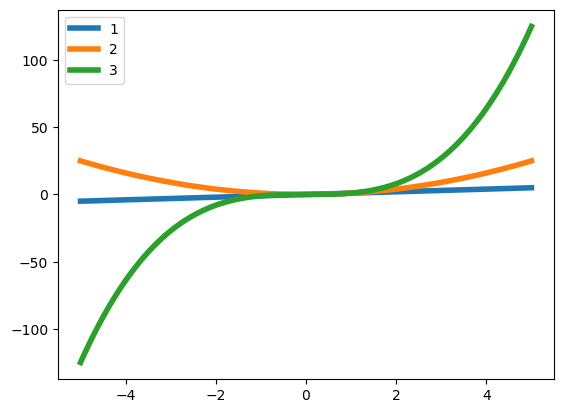

In [125]:
table.plot(lw = 4);

We have looked at sympy in other chapters, however maybe not in a classic high school setting, where expanding and factoring polynomials is the order of the day.  Once we have wrapped our minds around polynomial functions, we are ready to integrate and differentiate, or so the thinking goes. They lend themselves to these operations, as manual algorithms, very nicely.

In [126]:
import sympy as sp  # redundant (harmless)

In [127]:
x = sp.Symbol('x')
poly = (x - 3)*(x + 2)*(x - 5)*(x + 7)
poly

(x - 5)*(x - 3)*(x + 2)*(x + 7)

In [128]:
poly.expand()

x**4 + x**3 - 43*x**2 + 23*x + 210

Here's a bridge to that Lambda Calculus, in that lambda has a meaning of "any function" and in the context below, makes an expression ready to iterate through some numpy array.  It "vectorizes" in other words, a term used by numpy itself.  Without resorting to for loop constructs, or mentioning indices, the `poly` expression races through our 400 point domain, applying itself to each x.

The original domain, and the corresponding range (linked by poly), stand side by side as columns, in a pandas DataFrame.  From the DataFrame object, we may plot directly.

In [129]:
f = sp.lambdify(x, poly, 'numpy')

In [130]:
domain = np.linspace(-7.5,7.5,400)
data_f = pd.DataFrame({"f(x)": f(domain)}, 
                      index = domain)
data_f.index.name = 'x'
data_f.head()

,f(x)
x,
-7.500000,360.937500
-7.462406,329.337298
-7.424812,298.496719
-7.387218,268.406589
-7.349624,239.057783


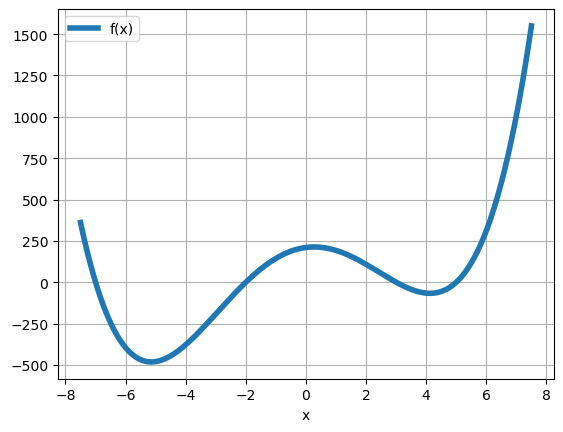

In [131]:
data_f.plot(grid=True, lw=4);

## Circular Functions

From polynomials we move to the trigonometric functions and properties such as amplitude and frequency.

The grand unification of circular functions and exponential functions on the Complex plane marks another branch point, where we optionally dive into fractals.

In [132]:
domain = np.linspace(-10, 10, 400)
data_trig = pd.DataFrame({"sin(x)": np.sin(domain),
                         "cos(x)": np.cos(domain)},
                      index = domain)
data_trig.index.name = 'radians'
data_trig.head()

,sin(x),cos(x)
radians,,
-10.000000,0.544021,-0.839072
-9.949875,0.501297,-0.865275
-9.899749,0.457313,-0.889306
-9.849624,0.412181,-0.911102
-9.799499,0.366013,-0.930610


The plot we get by calling the plot method on our DataFrame (`data_trig`) with no arguments is already more than acceptable.  Capturing the output as `ax` was optional in this case, but in future examples (below), customizing title, labels and legend involve communicating with this "axes" object.  

matplotlib is is complicated package in giving us lots of objects we might want to communicate with, about line thickness, marker size, label fonts and so on. 

Your high school might refer you to various resources to help you continue broadening your vocabulary, while deepening your fluency, with this or any other package.  The math course itself might externalize some of these details.

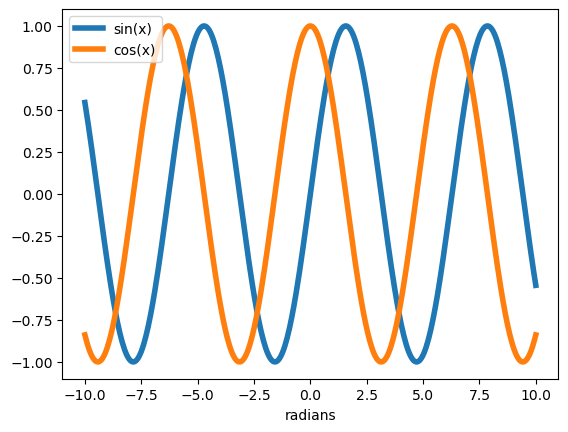

In [133]:
ax = data_trig.plot(lw=4)

A jump to the topic of alternating current and hydro-dam generators as a topic would appropriately go here.  The application of circular functions to electricity concepts comes up a lot in high school physics.

The final roundup of critical functions comes with Euler's famous formula:

$$
e^{ \pm i\theta } = \cos \theta \pm i\sin \theta
$$

In [134]:
theta = sp.Symbol('theta')

In [135]:
cos_series = sp.cos(theta).series()
cos_series

1 - theta**2/2 + theta**4/24 + O(theta**6)

In [136]:
i_sin_series = sp.I * sp.sin(theta).series()
i_sin_series

I*(theta - theta**3/6 + theta**5/120 + O(theta**6))

In [137]:
exponential = sp.exp(sp.I * theta)
exponential

exp(I*theta)

In [138]:
exponential.series()

1 + I*theta - theta**2/2 - I*theta**3/6 + theta**4/24 + I*theta**5/120 + O(theta**6)

In [139]:
expr = cos_series + i_sin_series
expr.simplify()

1 + I*theta - theta**2/2 - I*theta**3/6 + theta**4/24 + I*theta**5/120 + O(theta**6)

In [140]:
euler = sp.lambdify(theta, exponential, 'numpy')

In [141]:
domain     = np.linspace(0, 10, 200)  # for wrapping around and around the circle
data_euler = pd.DataFrame({"euler(r)": euler(domain)},  # r for radians
                            index = domain)
data_euler.index.name = 'radians'
data_euler.head()

,euler(r)
radians,
0.000000,1.000000+0.000000j
0.050251,0.998738+0.050230j
0.100503,0.994954+0.100333j
0.150754,0.988658+0.150183j
0.201005,0.979866+0.199654j


In [142]:
data_euler.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 200 entries, 0.0 to 10.0
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype     
---  ------    --------------  -----     
 0   euler(r)  200 non-null    complex128
dtypes: complex128(1)
memory usage: 4.7 KB


In [143]:
euler_df = data_euler.copy() # keep a backup before adding columns
euler_df["cos(r)"] = euler_df["euler(r)"].apply(lambda x: x.real)
euler_df["sin(r)"] = euler_df["euler(r)"].apply(lambda x: x.imag)

In [144]:
euler_df.head()

,euler(r),cos(r),sin(r)
radians,,,
0.000000,1.000000+0.000000j,1.000000,0.000000
0.050251,0.998738+0.050230j,0.998738,0.050230
0.100503,0.994954+0.100333j,0.994954,0.100333
0.150754,0.988658+0.150183j,0.988658,0.150183
0.201005,0.979866+0.199654j,0.979866,0.199654


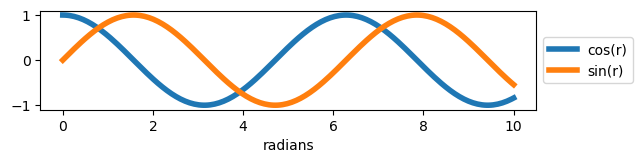

In [145]:
ax = euler_df.plot(y=["cos(r)", "sin(r)"], lw=4)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_aspect("equal")

[Marker Styles](https://matplotlib.org/stable/api/markers_api.html)


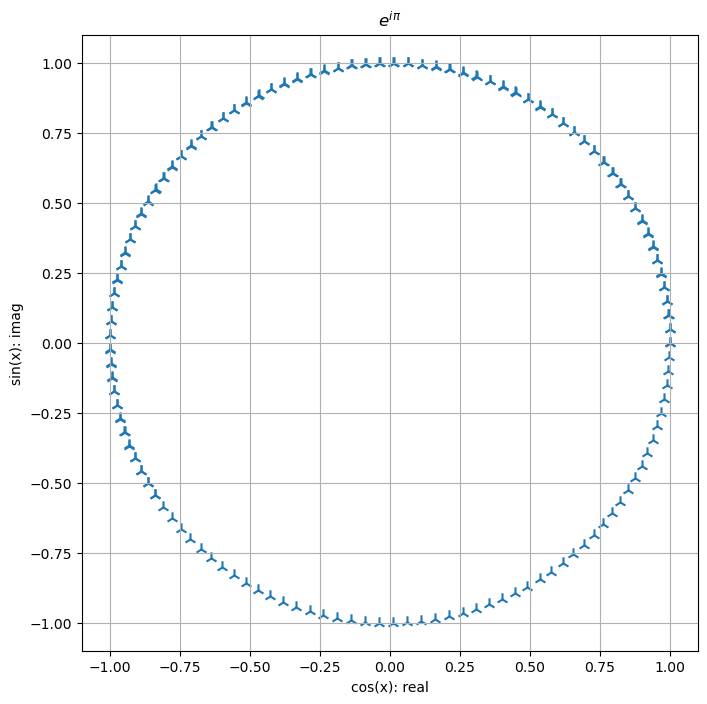

In [146]:
ax = euler_df.plot(x="cos(r)", y="sin(r)",
                   figsize=(8,8),
                   kind="scatter", 
                   s=80, marker="2")
ax.set_aspect("equal")
ax.set_xlabel("cos(x): real")
ax.set_ylabel("sin(x): imag")
ax.set_title(r"$e^{i \pi}$")
ax.grid(True)

## Delta Calculus

The reason for calling it Delta Calculus is to get around using a proper name, such as "Newtonian", much as we're free to recapitulate his work in "fluxions".  

The reader is reminded of many calculi, as maths are full of them, and room for Lambda Calculus appears, with a kind of symmetry between them.  That's to expand the meaning of both, perhaps, to embrace their destinies.

The focus I've been adopting, as a curriculum dev, is to focus on the data science curve known as the Gaussian or normal curve.  This "bell curve" is very well thought out and much studied, and its integral, the CDF, is likewise prevalent as a pattern, such as when we watch a fad sweep through a population:  early adopters, over the hump, late adopters.  

How it all adds up looks like a lazy S, almost like the integral symbol itself $\int$.

The customary discussion of slope versus area, with the CDF plotting the PDF's growing area (integral), and the PDF plotting the CDF's changing slope (derivative), carries over into this more statistically minded context.  Calculus is our bridge to data science and its sociological topics, not just to the classical mechanics in physics.

Machine Learning is likewise a gateway into differential calculus as the idea of gradient descent starts quickly, with terrain metaphors.  We've all descended gradients.  We will get to slopes and tangent planes later.  

Starting with complex applications and then refining the concepts through progressive simplification, is something science is good at. We look for the generalizable patterns.

In [147]:
domain = np.linspace(-6, 6, 500)

In [148]:
x, σ, μ = sp.symbols(['x','σ', 'μ'])

In [149]:
f = sp.Symbol('f')

In [150]:
expr1 = (1/(σ * sp.sqrt(2 * sp.pi)))
expr2 = sp.exp(sp.Rational(-1,2) * ((x - μ)/σ)**2)
gaussian = expr2 * expr1
gaussian

sqrt(2)*exp(-(x - μ)**2/(2*σ**2))/(2*sqrt(pi)*σ)

Play around with $\mu$ and $\sigma$, the mean and standard deviation parameters, conventionally set to 0 and 1 respectively, for the most standard of the normal bell curves.  Play around with these.

In [151]:
standard = gaussian.copy()
standard = standard.subs(μ, 0)
standard = standard.subs(σ, 1)
standard

sqrt(2)*exp(-x**2/2)/(2*sqrt(pi))

In [152]:
IQ = gaussian.copy()
IQ = IQ.subs(μ, 100)
IQ = IQ.subs(σ, 15)
IQ

sqrt(2)*exp(-(x - 100)**2/450)/(30*sqrt(pi))

In [153]:
domain = np.linspace(-6, 6, 500)
f = sp.lambdify(x, standard, 'numpy') 
y_vals = f(domain)

In [154]:
bell_curve_df = pd.DataFrame({'x':domain, 'y':y_vals})
bell_curve_df.head()

,x,y
0,-6.000000,6.075883e-09
1,-5.975952,7.016936e-09
2,-5.951904,8.099059e-09
3,-5.927856,9.342657e-09
4,-5.903808,1.077098e-08


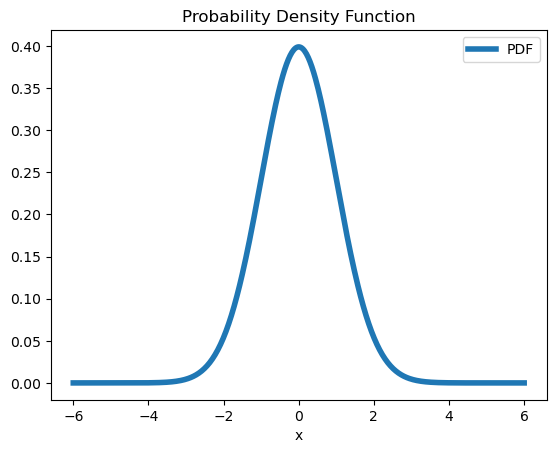

In [155]:
ax = bell_curve_df.plot(x='x', y='y', lw=4)
ax.set_title("Probability Density Function");
ax.legend(['PDF']);

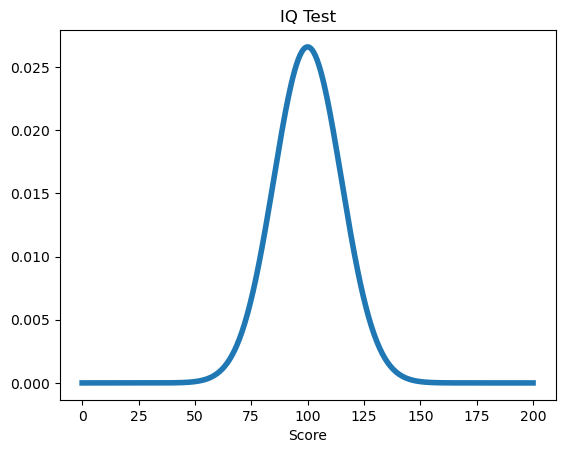

In [156]:
# create data structure
new_domain  = np.linspace(0, 200, 500)
iq_function = sp.lambdify(x, IQ, 'numpy') # IQ defined above
y_vals      = iq_function(new_domain)
iq_curve_df = pd.DataFrame({'x':new_domain, 'y':y_vals})

# plot
ax = iq_curve_df.plot(x='x', y='y', legend=None, lw=4)
ax.set_xlabel("Score")
ax.set_title("IQ Test");

In [157]:
sp.integrate(standard, (x, -6, 6)).evalf(6)

1.00000

In [158]:
bell_curve_df

,x,y
0,-6.000000,6.075883e-09
1,-5.975952,7.016936e-09
2,-5.951904,8.099059e-09
3,-5.927856,9.342657e-09
4,-5.903808,1.077098e-08
...,...,...
495,5.903808,1.077098e-08
496,5.927856,9.342657e-09
497,5.951904,8.099059e-09
498,5.975952,7.016936e-09


In [159]:
h = abs(domain[0] - domain[1])
h

0.02404809619238435

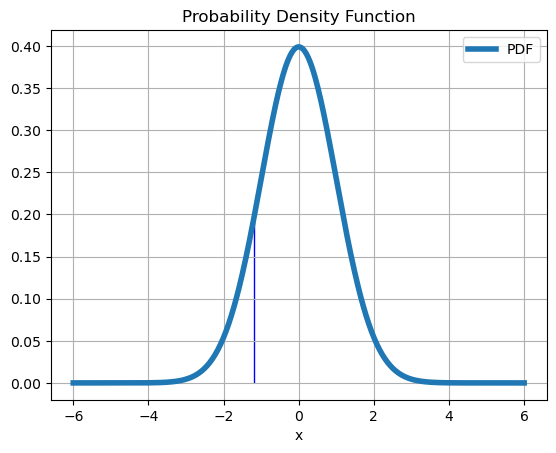

In [160]:
import matplotlib.patches as mpatches

ax = bell_curve_df.plot(x='x', y='y', lw=4)
ax.set_title("Probability Density Function")
ax.grid(True)
ax.legend(['PDF'])

row = 200 # of 500 total
left, bottom, width, height = (bell_curve_df.iloc[row,0]-h/2,
                               0,h, # width h
                               bell_curve_df.iloc[row,1])
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=True,
                        color="blue")
ax.add_patch(rect);

The area accumulating under the PDF registers as the CDF.  The area starts at zero then climbs more and more steeply.  The area continues to grow, but at a slowing rate.

The cumulative sum of thin rectanglar areas, each with a PDF y-value height, times a delta h width of about 0.024, approximates the numeric integral.  More and more rectangles get added.

The CDF levels off at 1.0, as it should, given it's tracking the area under the standard bell curve, of probability 1 its total area.  

Other PDFs, not bell curves, e.g. the Poisson Distribution, will also have a total area of 1 and a corresponding CDF cumulative sum.

In [161]:
bell_curve_df['CDF'] = np.cumsum(bell_curve_df['y']*h) # discrete integral

$$
\text{cdf} =  \int_{a}^{b} \text{pdf}(x) \,dx
$$

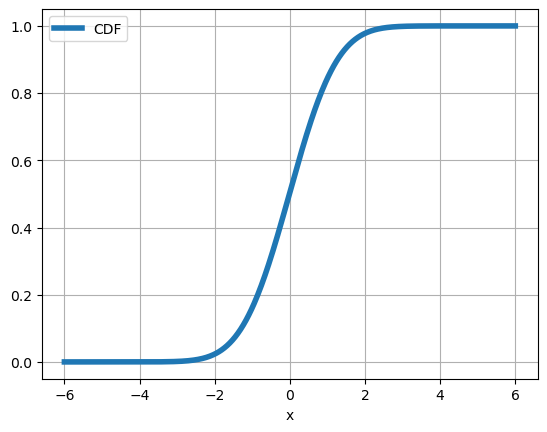

In [162]:
ax = bell_curve_df.plot(x='x', y='CDF', lw=4)
ax.grid(True)

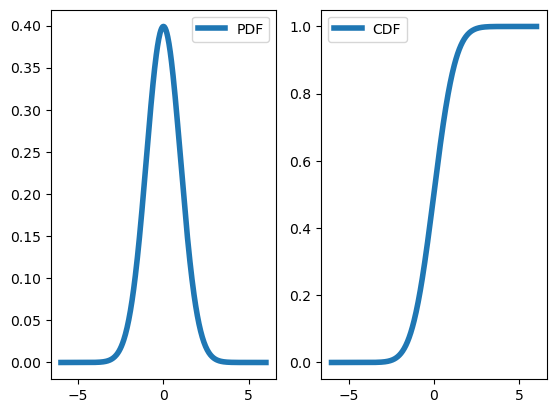

In [163]:
plt.subplots()
plt.subplot(121)
plt.plot(bell_curve_df['x'], bell_curve_df['y'], lw=4)
plt.legend(['PDF'])
plt.subplot(122)
plt.plot(bell_curve_df['x'], bell_curve_df['CDF'], lw=4)
plt.legend(['CDF']);

The CDF's slope registers as the PDF.  The slope starts at zero, then becomes positive and stays positive, but reaches a peak steepness at x=0, and then starts to again level off.

$$
\text{pdf} =  \frac{dy}{dx} \text{cdf}(x)
$$